In [30]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv("spam.csv", encoding='latin-1')
df=df[["v1","v2"]]
df.columns=["Class","Message"]
df.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Class"]=le.fit_transform(df["Class"])

In [10]:
df.head() # 0:ham 1:spam

,Class,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
import re
def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # remove special characters
    text = re.sub(r'\s+', ' ', text)  # remove extra spaces
    return text.lower()

In [13]:
df["Message"]=df["Message"].apply(clean_text)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
vc=TfidfVectorizer(stop_words="english")
X=vc.fit_transform(df["Message"])
Y=df["Class"]

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [26]:
from sklearn.naive_bayes import MultinomialNB
md=MultinomialNB()
md.fit(X_train,Y_train)
Y_pr=md.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Accuracy:", accuracy_score(Y_test, Y_pr))

Accuracy: 0.97847533632287


In [38]:
print("\nClassification Report:\n", classification_report(Y_test, Y_pr))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       982
           1       1.00      0.82      0.90       133

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.98      0.98      1115



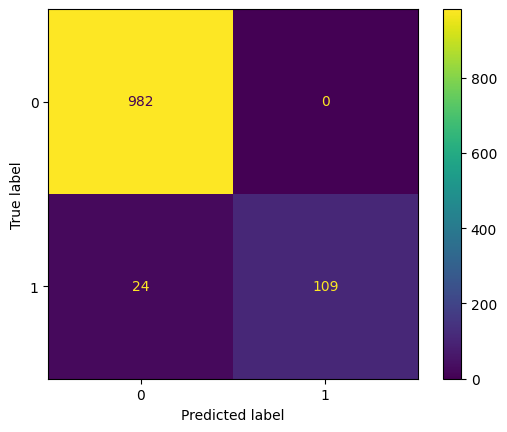

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(Y_test, Y_pr,labels=md.classes_)
disp=ConfusionMatrixDisplay(cm,display_labels=md.classes_)
disp.plot()
plt.show()

In [34]:
from sklearn.svm import LinearSVC
md1=LinearSVC()
md1.fit(X_train,Y_train)
Y_pr1=md1.predict(X_test)

In [36]:
print("Accuracy:", accuracy_score(Y_test, Y_pr1))

Accuracy: 0.9820627802690582


In [40]:
print("\nClassification Report:\n", classification_report(Y_test, Y_pr1))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       982
           1       0.97      0.87      0.92       133

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



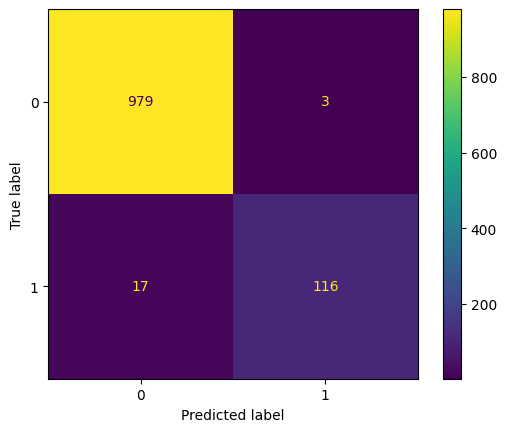

In [35]:
cm=confusion_matrix(Y_test, Y_pr1,labels=md1.classes_)
disp=ConfusionMatrixDisplay(cm,display_labels=md1.classes_)
disp.plot()
plt.show()

In [42]:
def predict_spam(text):
    text = clean_text(text)
    vector = vc.transform([text])
    prediction = md1.predict(vector)
    return "Spam" if prediction[0] == 1 else "Not Spam"
print(predict_spam("Congratulations! You won a $1000 Walmart gift card. Click here."))

Spam
